# FDS Assignment 1: UN Debates, World Happiness and International Trade

We can start by loading the data:

In [1]:
import os
import numpy as np
import pandas as pd

sessions = np.arange(25, 76)
data=[]

for session in sessions:
    directory = "./TXT/Session " + str(session) + " - " + str(1945 + session)
    for filename in os.listdir(directory):
        f = open(os.path.join(directory, filename), encoding='utf8')
        if filename[0] == ".":
            continue
        splt = filename.split("_")
        data.append([session, 1945 + session, splt[0], f.read()])

df_speech = pd.DataFrame(data, columns=['Session','Year','ISO-alpha3 Code','Speech'])
df_speech.tail()

,Session,Year,ISO-alpha3 Code,Speech
8476,75,2020,WSM,"Mr. President,\nDistinguished delegates,\nLadi..."
8477,75,2020,YEM,In the name of God the Merciful and the Compas...
8478,75,2020,ZAF,"President of the General Assembly, Secretary-G..."
8479,75,2020,ZMB,"Your excellency Mr. Volkan Bozkir, President o..."
8480,75,2020,ZWE,"Your Excellency, Ambassador Volkan Bozkir, Pre..."


In [2]:
import nltk
from nltk.corpus import stopwords
import re
import string
from nltk import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\agniv\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\agniv\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\agniv\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [3]:
def preprocess(speech):
    #tolower
    speech = speech.lower()
    
    #stopwords
    text = word_tokenize(speech)
    tokens_without_sw = [word for word in text if not word in stopwords.words("english")] 
    processed_speech = (" ").join(tokens_without_sw)
    
    #punctuation, indents etc
    processed_speech = processed_speech.translate(str.maketrans('', '', string.punctuation))
    processed_speech = processed_speech.replace("\n"," ")
    processed_speech = processed_speech.replace("\t"," ")
    processed_speech = re.sub('\s*\d+\s*', ' ', processed_speech)
    
    return processed_speech

In [4]:
def yearly_processing(speeches):
    total_speech = ''
    for speech in speeches:
        proc_speech = preprocess(speech)
        total_speech += (' ' + proc_speech)
    
    return total_speech

In [5]:
def iteration(all_years):
    corpus = []
#     for year in all_years:
    for i in range(1970, 2021):
        print(i)
        speeches = yearly_processing(all_years.loc[i]['Speech'])
        corpus.append(speeches)

    return corpus

In [7]:
corpus = iteration(df_speech.set_index(["Year", "ISO-alpha3 Code"]))

1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020


In [8]:
print(len(corpus))

51


In [13]:
with open('corpus.txt', 'w', encoding='utf-8') as f:
    f.writelines(corpus)

## TF-IDF

*Tf* means term-frequency while *tf-idf* means term-frequency times inverse document-frequency. This is a common term weighting scheme in information retrieval that has also found good use in document classification. The goal of using tf-idf instead of the raw frequencies of occurrence of a token in a given document (as in the previous example) is to scale down the impact of tokens that occur very frequently in a given corpus and that are hence empirically less informative than features that occur in a small fraction of the training corpus. If needed, more info can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html).

In [9]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
feature_names = vectorizer.get_feature_names()
dense = X.todense()
denselist = dense.tolist()

tf_idf = pd.DataFrame(denselist, columns=feature_names).T
print(tf_idf)

          0    1    2    3    4    5    6    7    8    9   ...   41   42   43  \
aa       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
aaa      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
aac      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
aachen   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
aaf      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
...      ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
шг       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
ьо       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
қарекет  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
қылмақ   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
ﬂagrant  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

               44   45     

In [15]:
tf_idf.to_csv('tfidf.csv')

In [105]:
tf_idf = pd.read_csv('tfidf.csv')
print(tf_idf)

          word  1970  1971  1972  1973  1974  1975  1976  1977  1978  ...  \
0           aa   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
1          aaa   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
2          aac   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
3       aachen   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
4          aaf   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
...        ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
67030       шг   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
67031       ьо   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
67032  қарекет   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
67033   қылмақ   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
67034  ﬂagrant   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   

       2011  2012  2013      2014  2015      2016  2017      2018  2019  \


## Word bank

List of good words:

In [114]:
predictors = [
    'temperature', 'climate', 'weather', 'droughts', 'globalwarming', 'atmosphere', 'ozone', 'ice', 'deforestation', 'heating', 
    'glaciers', 'melting', 'heatwave', 'disaster', 'environment', 'environmental', 'climatologists', 'climatology', 'wildfire', 
    'forestfire', 'solar', 'radiation', 'thermotropic', 'thermal', 'humidity', 'heat'
]

frequencies = [tf_idf[tf_idf['word'] == predictor] for predictor in predictors]
freq_df = pd.concat(frequencies).set_index('word')
print(freq_df)

                   1970      1971      1972      1973      1974      1975  \
word                                                                        
temperature    0.000000  0.000000  0.000000  0.000204  0.000000  0.000000   
climate        0.003367  0.004001  0.008269  0.008888  0.007429  0.005635   
weather        0.000000  0.000121  0.000118  0.000358  0.000665  0.000000   
droughts       0.000000  0.000000  0.000000  0.000803  0.000249  0.000253   
globalwarming  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
atmosphere     0.006173  0.006973  0.010281  0.010576  0.009208  0.009463   
ozone          0.000000  0.000000  0.000000  0.000000  0.000143  0.000000   
ice            0.000000  0.000000  0.000173  0.000000  0.000162  0.000330   
deforestation  0.000000  0.000153  0.000150  0.000000  0.000000  0.000000   
heating        0.000000  0.000000  0.000000  0.000000  0.000210  0.000000   
glaciers       0.000000  0.000000  0.000000  0.000000  0.000000  0.000219   

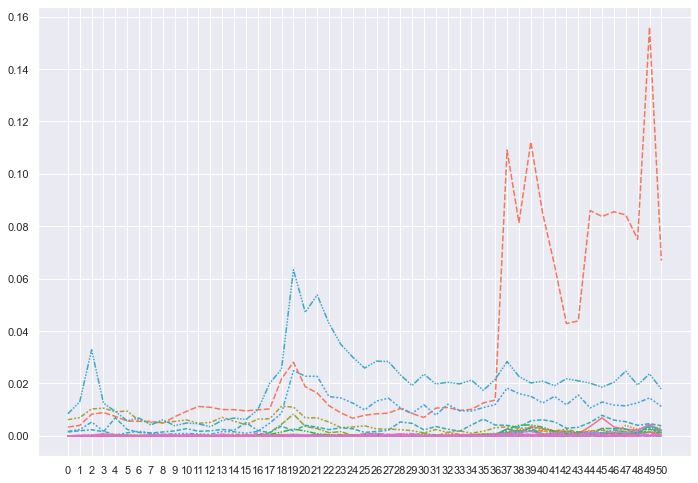

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

# plt.plot(freq_df.columns.values, freq_df.values)
# plt.show()
# print(freq_df.values)
# freq_df.loc[~(freq_df<=0.05).all(axis=1)]
freq_df.loc[~(freq_df<=0.05).all(axis=1)]

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(data=freq_df.T)
plt.legend([],[], frameon=False)

In [107]:
freq_df.sum().median()

0.056082878

<AxesSubplot:>

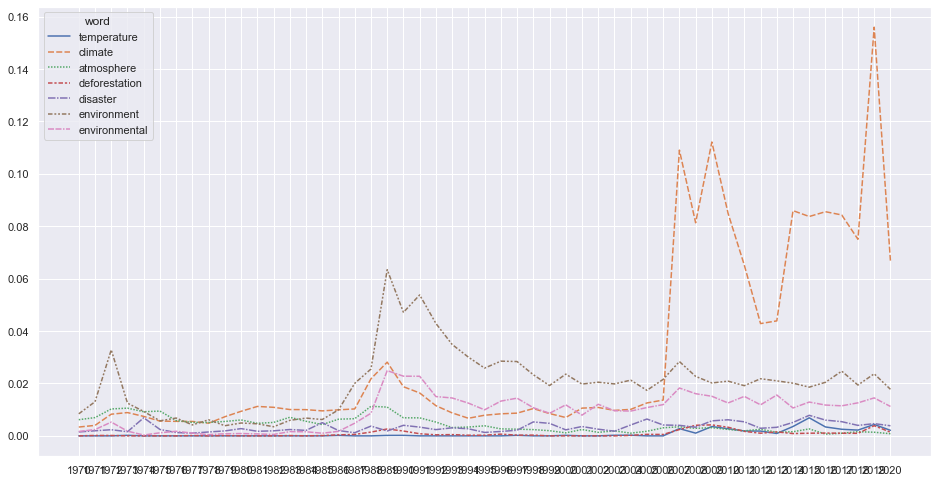

In [111]:
filter_var = 0.04
filtered_freq_df = freq_df.loc[(freq_df.sum(axis=1) >= filter_var)]

sns.set(rc={'figure.figsize':(16,8.27)})
sns.lineplot(data=filtered_freq_df.T)
# plt.legend([],[], frameon=False)

In [112]:
temperature_df = pd.read_csv('temperature_data.csv').set_index('Year')
print(temperature_df)

      Value
Year       
1970   0.04
1971  -0.02
1972  -0.16
1973   0.34
1974  -0.19
1975   0.14
1976  -0.23
1977   0.25
1978   0.11
1979   0.17
1980   0.31
1981   0.53
1982   0.12
1983   0.50
1984   0.07
1985   0.10
1986   0.30
1987   0.45
1988   0.58
1989   0.37
1990   0.66
1991   0.53
1992   0.25
1993   0.35
1994   0.49
1995   0.78
1996   0.35
1997   0.64
1998   0.98
1999   0.78
2000   0.63
2001   0.85
2002   0.97
2003   0.95
2004   0.82
2005   1.09
2006   0.98
2007   1.13
2008   0.90
2009   0.91
2010   1.15
2011   0.92
2012   0.96
2013   1.03
2014   1.02
2015   1.40
2016   1.52
2017   1.39
2018   1.19
2019   1.40
2020   1.56


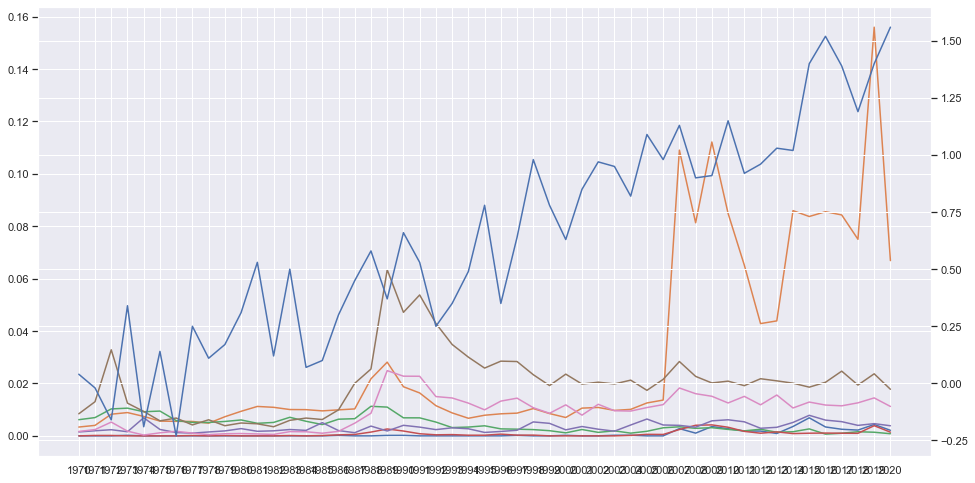

In [126]:
fig, ax = plt.subplots()
ax.plot(filtered_freq_df.T)
ax2 = ax.twinx()
ax2.plot(temperature_df.values)
# temperature_df.plot(legend=False)
# ax.figure.legend()
plt.box(False)
plt.show()